In [3]:
!pip install boto3

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import boto3
import sagemaker
import pandas as pd

sess   = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name

sm = boto3.Session().client(service_name='sagemaker', region_name=region)

In [3]:
!head ./amazon20000.csv

In [65]:
df = pd.read_csv('amazon20000.csv')
df.shape

(19742, 15)

In [66]:
df_cleaned_and_filtered = df.dropna()
df_cleaned_and_filtered = df_cleaned_and_filtered.reset_index()
df_cleaned_and_filtered.shape

(19741, 16)

In [67]:
df_cleaned_and_filtered.head(5)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,0,US,12190288,R3FU16928EP5TC,B00AYB1482,668895143,Enlightened: Season 1,Digital_Video_Download,5,0,0,N,Y,I loved it and I wish there was a season 3,I loved it and I wish there was a season 3... ...,2015-08-31
1,1,US,30549954,R1IZHHS1MH3AQ4,B00KQD28OM,246219280,Vicious,Digital_Video_Download,5,0,0,N,Y,As always it seems that the best shows come fr...,As always it seems that the best shows come fr...,2015-08-31
2,2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,N,Y,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31
3,3,US,27072354,R7HOOYTVIB0DS,B008LOVIIK,239012694,Masterpiece: Inspector Lewis Season 5,Digital_Video_Download,5,0,0,N,Y,Five Stars,excellant this is what tv should be,2015-08-31
4,4,US,26939022,R1XQ2N5CDOZGNX,B0094LZMT0,535858974,On The Waterfront,Digital_Video_Download,5,0,0,N,Y,Brilliant film from beginning to end,Brilliant film from beginning to end. All of t...,2015-08-31


In [69]:
df_cleaned_and_filtered = df_cleaned_and_filtered.query('helpful_votes > 0')
df_cleaned_and_filtered.shape

(2019, 16)

In [70]:
df_cleaned_and_filtered['pct_helpful_votes'] = df_cleaned_and_filtered['helpful_votes'] / df_cleaned_and_filtered['total_votes']
df_cleaned_and_filtered.shape

(2019, 17)

In [71]:
df_cleaned_and_filtered.head(5)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,pct_helpful_votes
2,2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,N,Y,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31,0.944444
5,5,US,4772040,R1HCST57W334KN,B0112OSOQE,38517795,Rick and Morty Season 2,Digital_Video_Download,5,5,6,N,Y,Best show on TV right now,If you don't like this show. Go back to your n...,2015-08-31,0.833333
6,6,US,12910040,R32BUTYQS1ZJBQ,B000NPE5SA,373323715,Africa Screams,Digital_Video_Download,4,1,1,N,Y,Very funny. A typical mid 50's comedy,Very funny. A typical mid 50's comedy.,2015-08-31,1.000000
18,18,US,47856888,R1ZHHD1GTHGMNK,B005U9RM0W,728197314,Grimm Season 1,Digital_Video_Download,4,1,1,N,Y,If you're a sucker for supernatural series the...,If you're a sucker for supernatural series the...,2015-08-31,1.000000
55,55,US,52684121,R203639GCLF7XV,B00MYLVPFM,773772186,Amazing Race 8,Digital_Video_Download,1,5,5,N,Y,Like many other viewers I felt the Family edit...,Like many other viewers I felt the Family edit...,2015-08-31,1.000000


In [72]:
df_cleaned_and_filtered['is_helpful'] = df_cleaned_and_filtered['pct_helpful_votes'] > 0.75
df_cleaned_and_filtered.shape

(2019, 18)

In [73]:
df_cleaned_and_filtered.head(5)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,pct_helpful_votes,is_helpful
2,2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,N,Y,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31,0.944444,True
5,5,US,4772040,R1HCST57W334KN,B0112OSOQE,38517795,Rick and Morty Season 2,Digital_Video_Download,5,5,6,N,Y,Best show on TV right now,If you don't like this show. Go back to your n...,2015-08-31,0.833333,True
6,6,US,12910040,R32BUTYQS1ZJBQ,B000NPE5SA,373323715,Africa Screams,Digital_Video_Download,4,1,1,N,Y,Very funny. A typical mid 50's comedy,Very funny. A typical mid 50's comedy.,2015-08-31,1.000000,True
18,18,US,47856888,R1ZHHD1GTHGMNK,B005U9RM0W,728197314,Grimm Season 1,Digital_Video_Download,4,1,1,N,Y,If you're a sucker for supernatural series the...,If you're a sucker for supernatural series the...,2015-08-31,1.000000,True
55,55,US,52684121,R203639GCLF7XV,B00MYLVPFM,773772186,Amazing Race 8,Digital_Video_Download,1,5,5,N,Y,Like many other viewers I felt the Family edit...,Like many other viewers I felt the Family edit...,2015-08-31,1.000000,True


In [74]:
df_cleaned_and_filtered['is_positive_sentiment'] = (df_cleaned_and_filtered['star_rating'] >= 4).astype(int)
df_cleaned_and_filtered.head(5)

,index,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,pct_helpful_votes,is_helpful,is_positive_sentiment
2,2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,N,Y,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31,0.944444,True,1
5,5,US,4772040,R1HCST57W334KN,B0112OSOQE,38517795,Rick and Morty Season 2,Digital_Video_Download,5,5,6,N,Y,Best show on TV right now,If you don't like this show. Go back to your n...,2015-08-31,0.833333,True,1
6,6,US,12910040,R32BUTYQS1ZJBQ,B000NPE5SA,373323715,Africa Screams,Digital_Video_Download,4,1,1,N,Y,Very funny. A typical mid 50's comedy,Very funny. A typical mid 50's comedy.,2015-08-31,1.000000,True,1
18,18,US,47856888,R1ZHHD1GTHGMNK,B005U9RM0W,728197314,Grimm Season 1,Digital_Video_Download,4,1,1,N,Y,If you're a sucker for supernatural series the...,If you're a sucker for supernatural series the...,2015-08-31,1.000000,True,1
55,55,US,52684121,R203639GCLF7XV,B00MYLVPFM,773772186,Amazing Race 8,Digital_Video_Download,1,5,5,N,Y,Like many other viewers I felt the Family edit...,Like many other viewers I felt the Family edit...,2015-08-31,1.000000,True,0


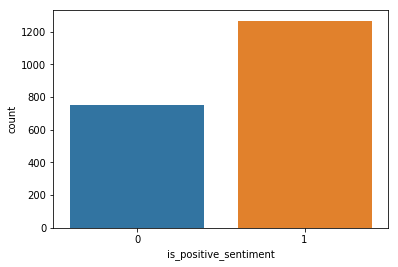

In [75]:
import seaborn as sns

sns.countplot(x='is_positive_sentiment', data=df_cleaned_and_filtered)


## Balance the dataset

In [76]:
from sklearn.utils import resample

is_negative_sentiment_df = df_cleaned_and_filtered.query('is_positive_sentiment == 0')
is_positive_sentiment_df = df_cleaned_and_filtered.query('is_positive_sentiment == 1')

is_positive_downsampled_df = resample(is_positive_sentiment_df,
                                      replace = False, # sample without replacement
                                      n_samples = len(is_negative_sentiment_df), # match minority n
                                      random_state = 27) # reproducible results

df_cleaned_and_filtered = pd.concat([is_negative_sentiment_df, is_positive_downsampled_df])


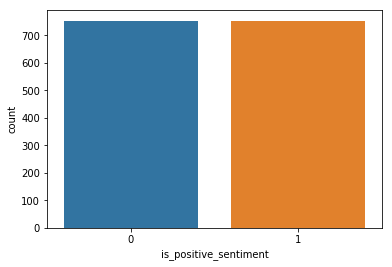

In [77]:
sns.countplot(x='is_positive_sentiment', data=df_cleaned_and_filtered)


In [78]:
df_cleaned_and_filtered = df_cleaned_and_filtered[['review_body', 'is_positive_sentiment']]
df_cleaned_and_filtered.shape

(1506, 2)

In [79]:
#df_cleaned_and_filtered.to_csv(path_or_buf='amazon-digital-video-download-cleaned-and-filtered.csv', index=False)

#### TODO:  Hold out 5-10% to test separate from AutoML 

In [82]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_cleaned_and_filtered, test_size=0.10)
train.shape

(1355, 2)

In [83]:
train.to_csv(path_or_buf='amazon-digital-video-download-cleaned-and-filtered.csv', index=False)

In [84]:
prefix = 'xgboost-reviews/autopilot'

sess.upload_data(path='amazon-digital-video-download-cleaned-and-filtered.csv', bucket=bucket, key_prefix=prefix + '/input')

's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/input/amazon-digital-video-download-cleaned-and-filtered.csv'

In [85]:
!aws s3 ls $bucket/$prefix/input/

2020-02-23 17:54:38     336920 amazon-digital-video-download-cleaned-and-filtered.csv


In [30]:
max_candidates = 25

job_config = {
    'CompletionCriteria': {
      'MaxRuntimePerTrainingJobInSeconds': 600,
      'MaxCandidates': max_candidates,
      'MaxAutoMLJobRuntimeInSeconds': 3600
    },
}

input_data_config = [{
      'DataSource': {
        'S3DataSource': {
          'S3DataType': 'S3Prefix',
          'S3Uri': 's3://{}/{}/input'.format(bucket, prefix)
        }
      },
      'TargetAttributeName': 'is_positive_sentiment'
    }
]

output_data_config = {
    'S3OutputPath': 's3://{}/{}/output'.format(bucket, prefix)
}

#problem_type = 'Regression'

#auto_ml_job_objective = {
#    'MetricName': 'MSE'
#}

## Launching the SageMaker AutoPilot job

We can now launch the job by calling the `create_auto_ml_job` API.

In [31]:
from time import gmtime, strftime, sleep
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime())

auto_ml_job_name = 'automl-dm-' + timestamp_suffix
print('AutoMLJobName: ' + auto_ml_job_name)

AutoMLJobName: automl-dm-23-06-15-57


In [32]:
sm.create_auto_ml_job(AutoMLJobName=auto_ml_job_name,
                      InputDataConfig=input_data_config,
                      OutputDataConfig=output_data_config,
                      AutoMLJobConfig=job_config,
#                      ProblemType=problem_type,
#                      AutoMLJobObjective=auto_ml_job_objective,
                      RoleArn=role)

{'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:835319576252:automl-job/automl-dm-23-06-15-57',
 'ResponseMetadata': {'RequestId': 'db4c52c6-4d06-4605-bbf3-1fa4f397646c',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amzn-requestid': 'db4c52c6-4d06-4605-bbf3-1fa4f397646c',
   'content-type': 'application/x-amz-json-1.1',
   'content-length': '92',
   'date': 'Sun, 23 Feb 2020 06:15:56 GMT'},
  'RetryAttempts': 0}}

### Tracking the progress of the AutoPilot job
SageMaker AutoPilot job consists of four high-level steps : 
* Data Preprocessing, where the dataset is split into train and validation sets.
* Recommending Pipelines, where the dataset is analyzed and SageMaker AutoPilot comes up with a list of ML pipelines that should be tried out on the dataset.
* Automatic Feature Engineering, where SageMaker AutoPilot performs feature transformation on individual features of the dataset as well as at an aggregate level.
* ML pipeline selection and hyperparameter tuning, where the top performing pipeline is selected along with the optimal hyperparameters for the training algorithm (the last stage of the pipeline). 

In [33]:
# Sleep for a bit to ensure the AutoML job above has time to start
import time
time.sleep(3)

job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job['AutoMLJobStatus']
job_sec_status = job['AutoMLJobSecondaryStatus']

if job_status not in ('Stopped', 'Failed'):
    while job_status in ('InProgress') and job_sec_status in ('AnalyzingData'):
        job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job['AutoMLJobStatus']
        job_sec_status = job['AutoMLJobSecondaryStatus']
        print(job_status, job_sec_status)
        sleep(30)
    print("Data analysis complete")
    
print(job)

InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress AnalyzingData
InProgress FeatureEngineering
Data analysis complete
{'AutoMLJobName': 'automl-dm-23-06-15-57', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:835319576252:automl-job/automl-dm-23-06-15-57', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/input'}}, 'TargetAttributeName': 'is_positive_sentiment'}], 'OutputDataConfig': {'S3OutputPath': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output'}, 'RoleArn': 'arn:aws:iam::835319576252:role/service-role/AmazonSageMaker-ExecutionRole-

In [34]:
job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job['AutoMLJobStatus']
job_sec_status = job['AutoMLJobSecondaryStatus']
print(job_status)
print(job_sec_status)
if job_status not in ('Stopped', 'Failed'):
    while job_status in ('InProgress') and job_sec_status in ('FeatureEngineering'):
        job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job['AutoMLJobStatus']
        job_sec_status = job['AutoMLJobSecondaryStatus']
        print(job_status, job_sec_status)
        sleep(30)
    print("Feature engineering complete")
    
print(job)

InProgress
FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress FeatureEngineering
InProgress ModelTuning
Feature engineeri

In [35]:
job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
job_status = job['AutoMLJobStatus']
job_sec_status = job['AutoMLJobSecondaryStatus']
print(job_status)
print(job_sec_status)
if job_status not in ('Stopped', 'Failed'):
    while job_status in ('InProgress') and job_sec_status in ('ModelTuning'):
        job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
        job_status = job['AutoMLJobStatus']
        job_sec_status = job['AutoMLJobSecondaryStatus']
        print(job_status, job_sec_status)
        sleep(30)
    print("Model tuning complete")
    
print(job)

InProgress
ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
InProgress ModelTuning
Completed MaxCandidatesReached
Model tuning complete
{'AutoMLJobName': 'automl-dm-23-06-15-57', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:835319576252:automl-job/automl-dm-23-06-15-57', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/input'}}, 'TargetAttributeName': 'is_positive_sentiment'}], 'OutputDataConfig': {'S3OutputPath': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output'}, 'RoleArn': 'arn:aws:iam::835319576252:role/servic

### Viewing all candidates explored by SageMaker AutoPilot
Once model tuning is complete, you can view all the candidates (pipeline evaluations with different hyperparameter combinations) that were explored by AutoML and sort them by their final performance metric.

In [36]:
candidates = sm.list_candidates_for_auto_ml_job(AutoMLJobName=auto_ml_job_name, 
                                                SortBy='FinalObjectiveMetricValue')['Candidates']
for index, candidate in enumerate(candidates):
    print(str(index) + "  " 
        + candidate['CandidateName'] + "  " 
        + str(candidate['FinalAutoMLJobObjectiveMetric']['Value']))

0  tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245  0.8139100074768066
1  tuning-job-1-c43b4a2c9b5945c7bd-012-8f35692a  0.7875940203666687
2  tuning-job-1-c43b4a2c9b5945c7bd-013-72cc9de2  0.7832080125808716
3  tuning-job-1-c43b4a2c9b5945c7bd-015-5cb268b7  0.7807019948959351
4  tuning-job-1-c43b4a2c9b5945c7bd-014-2099c358  0.7725560069084167
5  tuning-job-1-c43b4a2c9b5945c7bd-017-c1fed961  0.7468670010566711
6  tuning-job-1-c43b4a2c9b5945c7bd-004-d614d66c  0.7286970019340515
7  tuning-job-1-c43b4a2c9b5945c7bd-018-06cee4be  0.7218049764633179
8  tuning-job-1-c43b4a2c9b5945c7bd-003-13632f8b  0.7205510139465332
9  tuning-job-1-c43b4a2c9b5945c7bd-005-872927dd  0.7130330204963684


## Inspect SageMaker AutoPilot trials with Amazon SageMaker Experiments
SageMaker AutoPilot automatically creates a new experiment, and pushes information for each trial. 

In [37]:
from sagemaker.analytics import ExperimentAnalytics, TrainingJobAnalytics

exp = ExperimentAnalytics(
    sagemaker_session=sess, 
    experiment_name=auto_ml_job_name + '-aws-auto-ml-job',
)

df = exp.dataframe()
df

,TrialComponentName,DisplayName,SourceArn,SageMaker.ImageUri,SageMaker.InstanceCount,SageMaker.InstanceType,SageMaker.VolumeSizeInGB,_tuning_objective_metric,binary_classifier_model_selection_criteria,l1,...,train:accuracy - Count,SageMaker.ModelName,SageMaker.ModelPrimary.DataUrl,SageMaker.ModelPrimary.Image,processor_module,sagemaker_program,sagemaker_submit_directory,input_channel_mode,job_name,label_col
0,tuning-job-1-c43b4a2c9b5945c7bd-022-494b13d9-a...,tuning-job-1-c43b4a2c9b5945c7bd-022-494b13d9-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,382416733822.dkr.ecr.us-east-1.amazonaws.com/l...,1.0,ml.m5.4xlarge,50.0,validation:binary_classification_accuracy,loss_function,0.011840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tuning-job-1-c43b4a2c9b5945c7bd-026-c1634eff-a...,tuning-job-1-c43b4a2c9b5945c7bd-026-c1634eff-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tuning-job-1-c43b4a2c9b5945c7bd-025-f0f5d554-a...,tuning-job-1-c43b4a2c9b5945c7bd-025-f0f5d554-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245-a...,tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tuning-job-1-c43b4a2c9b5945c7bd-024-6600b7cb-a...,tuning-job-1-c43b4a2c9b5945c7bd-024-6600b7cb-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,tuning-job-1-c43b4a2c9b5945c7bd-021-1047c0c4-a...,tuning-job-1-c43b4a2c9b5945c7bd-021-1047c0c4-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tuning-job-1-c43b4a2c9b5945c7bd-012-8f35692a-a...,tuning-job-1-c43b4a2c9b5945c7bd-012-8f35692a-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,tuning-job-1-c43b4a2c9b5945c7bd-017-c1fed961-a...,tuning-job-1-c43b4a2c9b5945c7bd-017-c1fed961-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,tuning-job-1-c43b4a2c9b5945c7bd-018-06cee4be-a...,tuning-job-1-c43b4a2c9b5945c7bd-018-06cee4be-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,683313688378.dkr.ecr.us-east-1.amazonaws.com/s...,1.0,ml.m5.4xlarge,50.0,validation:accuracy,NaN,NaN,...,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,tuning-job-1-c43b4a2c9b5945c7bd-019-1f6b2f1c-a...,tuning-job-1-c43b4a2c9b5945c7bd-019-1f6b2f1c-a...,arn:aws:sagemaker:us-east-1:835319576252:train...,382416733822.dkr.ecr.us-east-1.amazonaws.com/l...,1.0,ml.m5.4xlarge,50.0,validation:binary_classification_accuracy,loss_function,0.625144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Viewing notebooks generated by SageMaker AutoPilot
Once data analysis is complete, SageMaker AutoPilot generates two notebooks: 
* Data exploration,
* Candidate definition.

In [38]:
job = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)
print(job)

{'AutoMLJobName': 'automl-dm-23-06-15-57', 'AutoMLJobArn': 'arn:aws:sagemaker:us-east-1:835319576252:automl-job/automl-dm-23-06-15-57', 'InputDataConfig': [{'DataSource': {'S3DataSource': {'S3DataType': 'S3Prefix', 'S3Uri': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/input'}}, 'TargetAttributeName': 'is_positive_sentiment'}], 'OutputDataConfig': {'S3OutputPath': 's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output'}, 'RoleArn': 'arn:aws:iam::835319576252:role/service-role/AmazonSageMaker-ExecutionRole-20191006T135881', 'AutoMLJobConfig': {'CompletionCriteria': {'MaxCandidates': 25, 'MaxRuntimePerTrainingJobInSeconds': 600, 'MaxAutoMLJobRuntimeInSeconds': 3600}}, 'CreationTime': datetime.datetime(2020, 2, 23, 6, 15, 57, 625000, tzinfo=tzlocal()), 'EndTime': datetime.datetime(2020, 2, 23, 6, 49, 21, 995000, tzinfo=tzlocal()), 'LastModifiedTime': datetime.datetime(2020, 2, 23, 6, 49, 22, 23000, tzinfo=tzlocal()), 'BestCandidate': {'CandidateName': '

### Let's copy all of the generated resources including the two notebooks.

In [39]:
generated_resources = job['AutoMLJobArtifacts']['DataExplorationNotebookLocation'].rstrip('notebooks/SageMakerAutopilotDataExplorationNotebook.ipynb')
generated_resources

's3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/sagemaker-automl-candidates/pr-1-a56204c6fd1b45cc849463c433d836530f503293e50441ad8fc088983d'

In [40]:
!rm -rf ./generated_module
!rm -rf ./notebooks
!aws s3 cp --recursive $generated_resources .

download: s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/sagemaker-automl-candidates/pr-1-a56204c6fd1b45cc849463c433d836530f503293e50441ad8fc088983d/generated_module/README.md to generated_module/README.md
download: s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/sagemaker-automl-candidates/pr-1-a56204c6fd1b45cc849463c433d836530f503293e50441ad8fc088983d/generated_module/candidate_data_processors/dpp4.py to generated_module/candidate_data_processors/dpp4.py
download: s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/sagemaker-automl-candidates/pr-1-a56204c6fd1b45cc849463c433d836530f503293e50441ad8fc088983d/generated_module/candidate_data_processors/dpp1.py to generated_module/candidate_data_processors/dpp1.py
download: s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/sagemaker-automl-candidates/pr-1-a56204c6fd1b

### In the file view, open the `notebooks/` and `generated_module/` folders.  Lots of useful information in there!

## Deploying the best candidate
Now that we have successfully completed the AutoML job on our dataset and visualized the trials, we can create a model from any of the trials with a single API call and then deploy that model for online or batch prediction using [Inference Pipelines](https://docs.aws.amazon.com/sagemaker/latest/dg/inference-pipelines.html). For this notebook, we deploy only the best performing trial for inference.

The best candidate is the one we're really interested in.

In [41]:
best_candidate = sm.describe_auto_ml_job(AutoMLJobName=auto_ml_job_name)['BestCandidate']
best_candidate_identifier = best_candidate['CandidateName']

print("Candidate name: " + best_candidate_identifier)
print("Metric name: " + best_candidate['FinalAutoMLJobObjectiveMetric']['MetricName'])
print("Metric value: " + str(best_candidate['FinalAutoMLJobObjectiveMetric']['Value']))

Candidate name: tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245
Metric name: validation:accuracy
Metric value: 0.8139100074768066


In [42]:
best_candidate

{'CandidateName': 'tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245',
 'FinalAutoMLJobObjectiveMetric': {'MetricName': 'validation:accuracy',
  'Value': 0.8139100074768066},
 'ObjectiveStatus': 'Succeeded',
 'CandidateSteps': [{'CandidateStepType': 'AWS::SageMaker::ProcessingJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:835319576252:processing-job/db-1-f068ce5d99184a55b5b97cb12879bd3eea77451833b44b0ab019da7f96',
   'CandidateStepName': 'db-1-f068ce5d99184a55b5b97cb12879bd3eea77451833b44b0ab019da7f96'},
  {'CandidateStepType': 'AWS::SageMaker::TrainingJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:835319576252:training-job/automl-dm--dpp4-1-01941bd2159c4b9aae49a0516bdc64555fa315f4c3244',
   'CandidateStepName': 'automl-dm--dpp4-1-01941bd2159c4b9aae49a0516bdc64555fa315f4c3244'},
  {'CandidateStepType': 'AWS::SageMaker::TransformJob',
   'CandidateStepArn': 'arn:aws:sagemaker:us-east-1:835319576252:transform-job/automl-dm--dpp4-rpb-1-d2c1b8dc94c04efc8dca220db121ad11774e

We can see the containers and models composing the Inference Pipeline.

In [43]:
for container in best_candidate['InferenceContainers']:
    print(container['Image'])
    print(container['ModelDataUrl'])
    print('======================')

683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3
s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/data-processor-models/automl-dm--dpp4-1-01941bd2159c4b9aae49a0516bdc64555fa315f4c3244/output/model.tar.gz
683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-xgboost:0.90-1-cpu-py3
s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/tuning/automl-dm--dpp4-xgb/tuning-job-1-c43b4a2c9b5945c7bd-023-45c91245/output/model.tar.gz
683313688378.dkr.ecr.us-east-1.amazonaws.com/sagemaker-sklearn-automl:0.1.0-cpu-py3
s3://sagemaker-us-east-1-835319576252/xgboost-reviews/autopilot/output/automl-dm-23-06-15-57/data-processor-models/automl-dm--dpp4-1-01941bd2159c4b9aae49a0516bdc64555fa315f4c3244/output/model.tar.gz


In [44]:
model_name = 'automl-dm-model-' + timestamp_suffix

model_arn = sm.create_model(Containers=best_candidate['InferenceContainers'],
                            ModelName=model_name,
                            ExecutionRoleArn=role)

print('Best candidate model ARN: ', model_arn['ModelArn'])

Best candidate model ARN:  arn:aws:sagemaker:us-east-1:835319576252:model/automl-dm-model-23-06-15-57


Let's deploy the pipeline.

In [45]:
# EndpointConfig name
timestamp_suffix = strftime('%d-%H-%M-%S', gmtime())
epc_name = 'automl-dm-epc-' + timestamp_suffix

# Endpoint name
ep_name = 'automl-dm-ep-' + timestamp_suffix
variant_name = 'automl-dm-variant-' + timestamp_suffix

print(ep_name)
print(variant_name)

automl-dm-ep-23-06-50-10
automl-dm-variant-23-06-50-10


In [46]:
ep_config = sm.create_endpoint_config(EndpointConfigName = epc_name,
                                      ProductionVariants=[{'InstanceType':'ml.m4.xlarge',
                                                           'InitialInstanceCount':1,
                                                           'ModelName':model_name,
                                                           'VariantName':variant_name}])

create_endpoint_response = sm.create_endpoint(EndpointName=ep_name,
                                              EndpointConfigName=epc_name)
print(create_endpoint_response['EndpointArn'])

arn:aws:sagemaker:us-east-1:835319576252:endpoint/automl-dm-ep-23-06-50-10


In [51]:
%%time
sm.get_waiter('endpoint_in_service').wait(EndpointName=ep_name)

CPU times: user 11.5 ms, sys: 1.03 ms, total: 12.5 ms
Wall time: 158 ms


In [52]:
resp = sm.describe_endpoint(EndpointName=ep_name)
status = resp['EndpointStatus']

print("Arn: " + resp['EndpointArn'])
print("Status: " + status)

Arn: arn:aws:sagemaker:us-east-1:835319576252:endpoint/automl-dm-ep-23-06-50-10
Status: InService


## Scoring the Best Candidate
Let's predict and score the validation set. We'll compute metrics ourselves just for fun.

In [53]:
sm_rt = boto3.Session().client('runtime.sagemaker', region_name=region)

In [62]:
#ep_name = ''

csv_line_predict_positive = """I loved it!  I wish there was a new season..."""
response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=csv_line_predict_positive)

response_body = response['Body'].read().decode("utf-8").strip()
response_body

'1'

In [63]:
csv_line_predict_negative = """This isn't good.  Complete waste of time."""
response = sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=csv_line_predict_negative)

response_body = response['Body'].read().decode("utf-8").strip()
response_body

'0'

In [89]:
for review_body in test['review_body']:
    print(review_body)

Love these mysteries
This is a review by my son, who is 6, so take it with a grain of salt:  &#34;It's the worst movie in the whole entire world because it's so annoying to hear and watch.  (It's so annoying) because it supposed to be annoying.  I recommend that you should not watch this movie.&#34;
OK plot, lousy acting....
I highly recommend &#34;A Beginner’s Guide to Happiness: 5 Meditations to Inspire Joy&#34; for novices and experts alike.  Ira offers tools to help those new, as well as those well-versed, in meditation to enhance their practice.  He offers his personal experience, and pulls other amazing stories from those in the community to enhance and inspire each individuals meditation practice in a short period of time.
Visually engaging, but light on plot.  Lot's of sizzle, but not much steak.  Would of given a 3.5 if it was possible.
I was a huge fan of this show!!! It seems a long wait to get them available to purchase and I was happy to buy season 5. However, season 4 doe

In [92]:
test['review_body'].shape

(151,)

In [115]:
responses = [int(sm_rt.invoke_endpoint(EndpointName=ep_name, ContentType='text/csv', Accept='text/csv', Body=review_body.replace(',', ' '))['Body'].read().decode("utf-8").strip())
             for review_body in test['review_body']]

In [118]:
tp = 0
fn = 0
tn = 0
fp = 0

# TODO:  Compare to test['is_positive_sentiment']
for index, response in enumerate(responses):
    if (test.iloc[index]['is_positive_sentiment'] == 1):
        if response == 1:
            # True positive
            tp = tp + 1
        else:
            # False negative
            fn = fn + 1
    else:
        if (test.iloc[index]['is_positive_sentiment'] == 0):
            # True negative
            tn = tn + 1
        else:
            # False positive
            fp = fp + 1

In [124]:
#Confusion matrix
print ("%d %d" % (tn, fp))
print ("%d %d" % (fn, tp))

accuracy  = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall    = tn / (tn + fn)
f1        = (2 * precision * recall)/(precision + recall)

print ("accuracy:\t%.4f\nprecision:\t%.4f\nrecall:\t\t%.4f\nf1:\t\t%.4f" % (accuracy, precision, recall, f1))

73 0
23 55
accuracy:	0.8477
precision:	1.0000
recall:		0.7604
f1:		0.8639
